In [1]:
#import the library files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Setting of proper views of rows and columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [2]:
#please change the path before running the file
path_0=(r"E:\EDA\Assignment\LEAD case study\Lead Scoring Assignment\leads.csv")
#Getting the input file and using gdp as the dataframe name.
df = pd.read_csv(path_0)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Sanity Checks

In [3]:
#checking the shape of the dataset
df.shape

(9240, 37)

In [4]:
#checking the variation in dataset
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
#checking th basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

# Analyzing the data

In [6]:
#defining a function "plotting" for categorical analysis
def plotting(df, column):
    
    df = df
    col = column
    #setting the figure size
    fig = plt.figure(figsize=(8,6))
    #plotting count plot
    sns.countplot(x= column,data = df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')

    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
      

In [7]:
#list of categorical columns for visualization
cat = ['Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

Plotting  Lead Origin


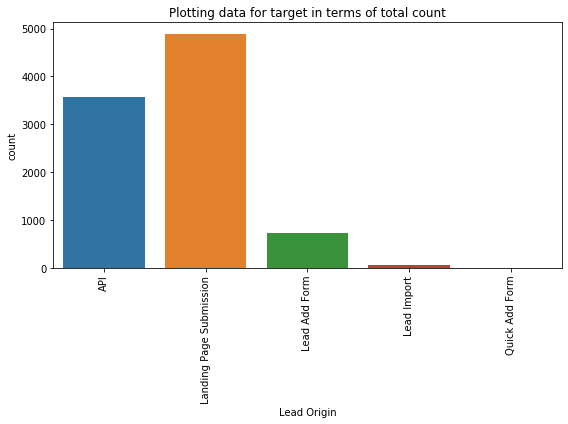

----------------------------------------------------------------------------------------------
Plotting  Lead Source


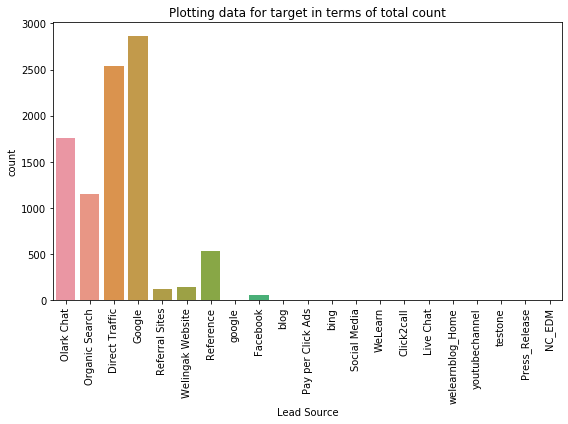

----------------------------------------------------------------------------------------------
Plotting  Do Not Email


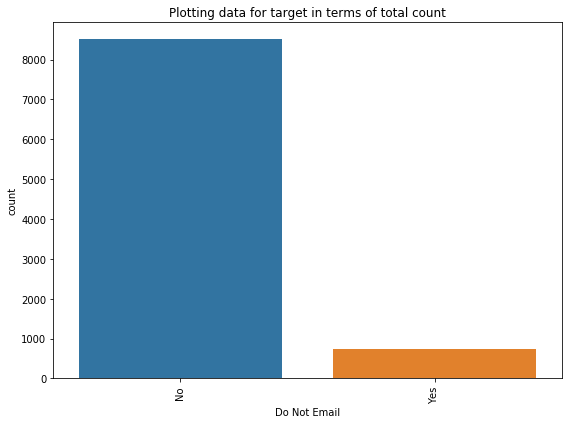

----------------------------------------------------------------------------------------------
Plotting  Do Not Call


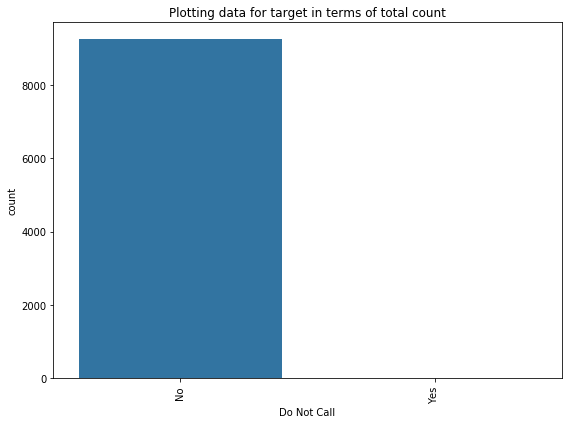

----------------------------------------------------------------------------------------------
Plotting  Last Activity


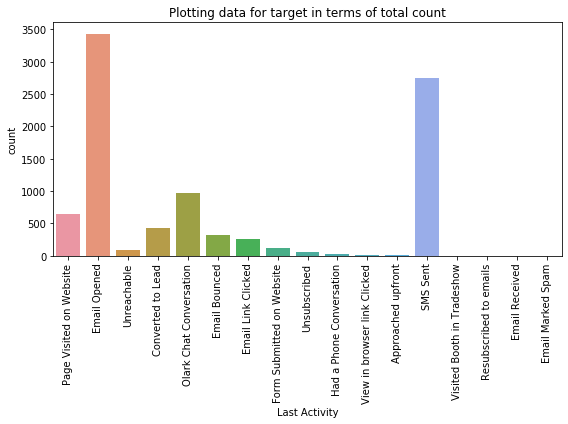

----------------------------------------------------------------------------------------------
Plotting  Country


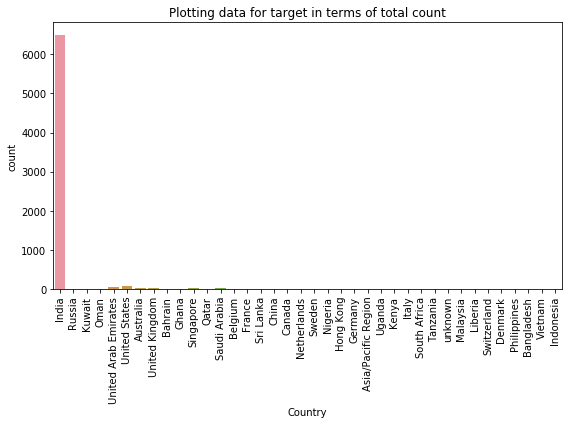

----------------------------------------------------------------------------------------------
Plotting  Specialization


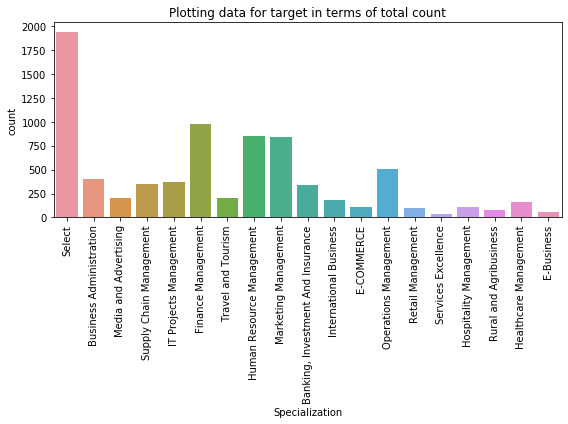

----------------------------------------------------------------------------------------------
Plotting  How did you hear about X Education


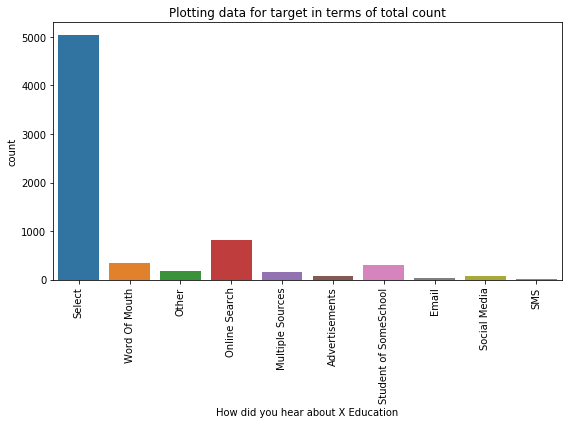

----------------------------------------------------------------------------------------------
Plotting  What is your current occupation


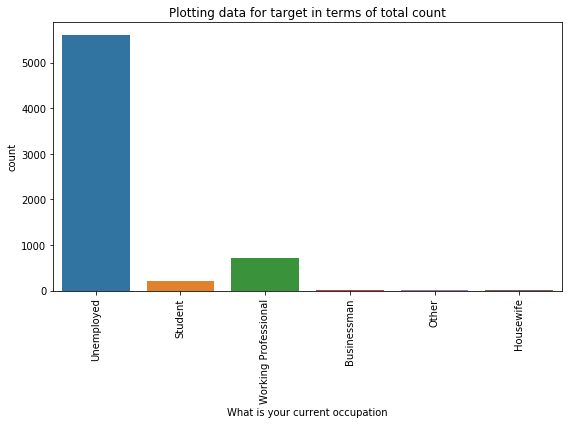

----------------------------------------------------------------------------------------------
Plotting  What matters most to you in choosing a course


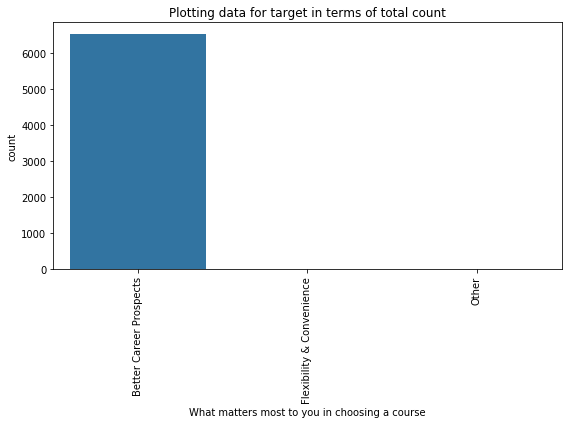

----------------------------------------------------------------------------------------------
Plotting  Search


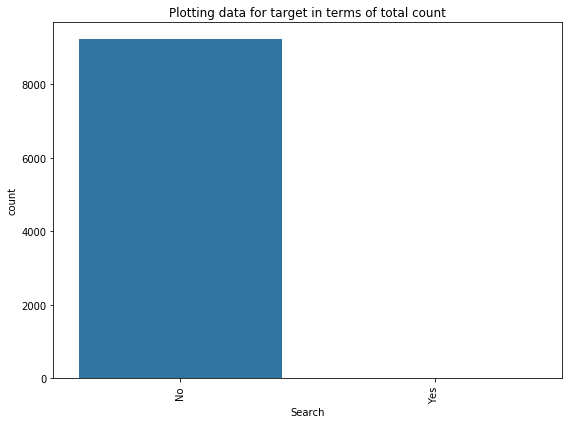

----------------------------------------------------------------------------------------------
Plotting  Magazine


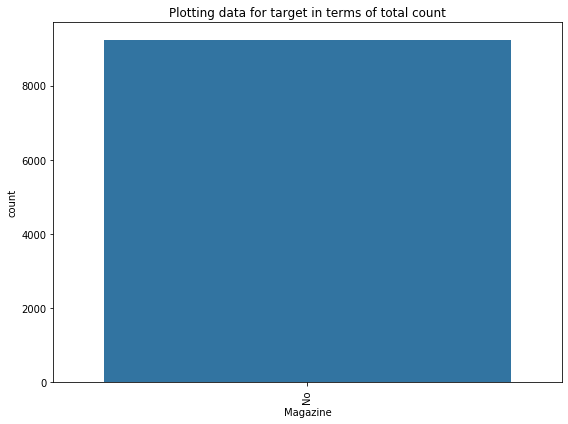

----------------------------------------------------------------------------------------------
Plotting  Newspaper Article


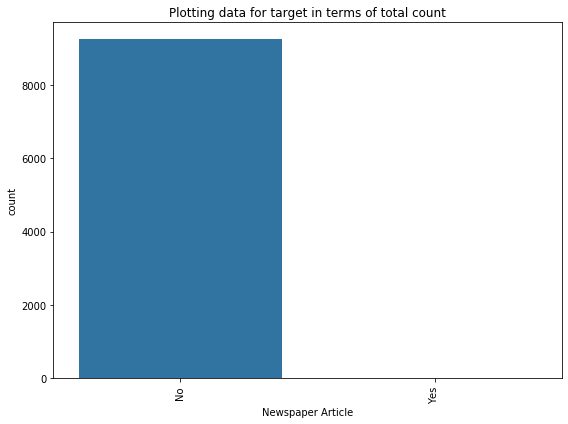

----------------------------------------------------------------------------------------------
Plotting  X Education Forums


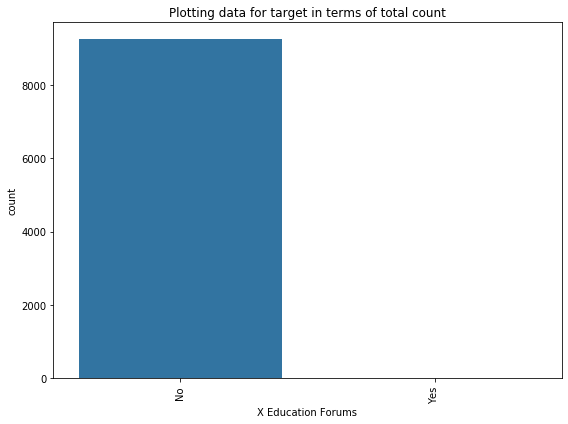

----------------------------------------------------------------------------------------------
Plotting  Newspaper


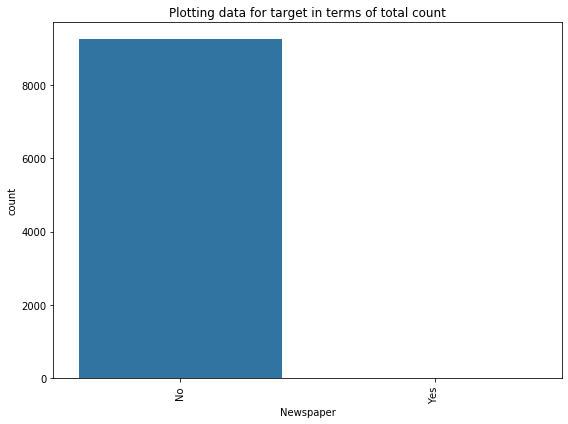

----------------------------------------------------------------------------------------------
Plotting  Digital Advertisement


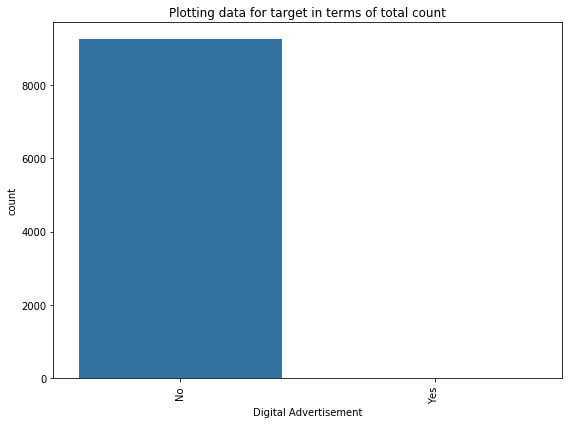

----------------------------------------------------------------------------------------------
Plotting  Through Recommendations


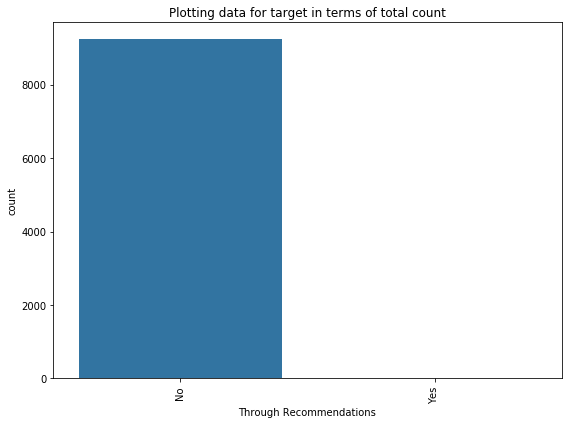

----------------------------------------------------------------------------------------------
Plotting  Receive More Updates About Our Courses


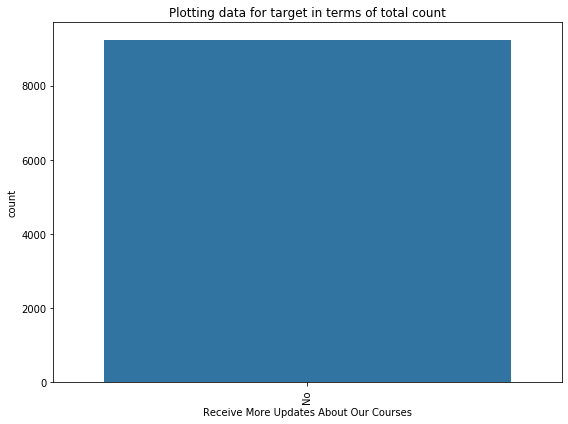

----------------------------------------------------------------------------------------------
Plotting  Tags


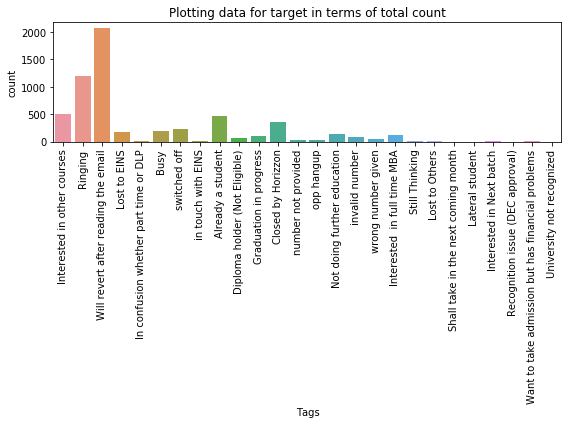

----------------------------------------------------------------------------------------------
Plotting  Lead Quality


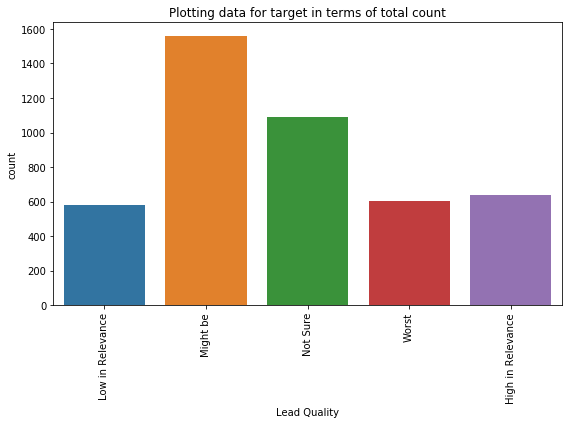

----------------------------------------------------------------------------------------------
Plotting  Update me on Supply Chain Content


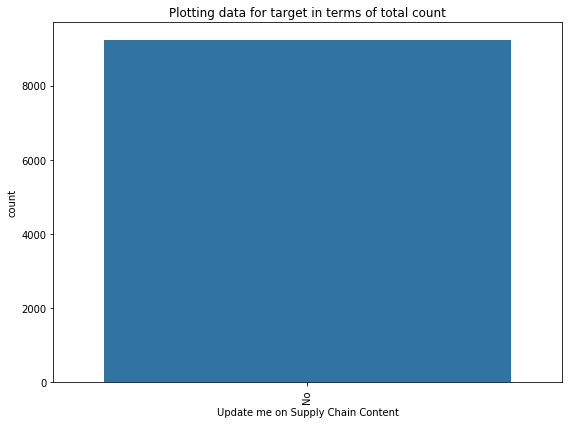

----------------------------------------------------------------------------------------------
Plotting  Get updates on DM Content


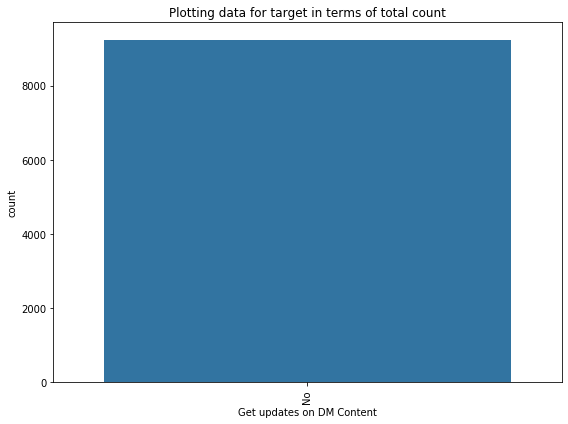

----------------------------------------------------------------------------------------------
Plotting  Lead Profile


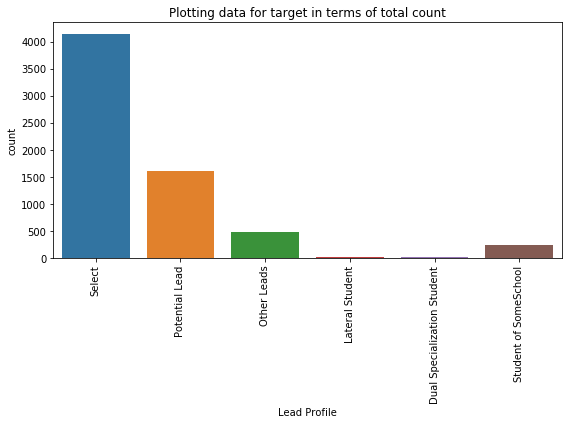

----------------------------------------------------------------------------------------------
Plotting  City


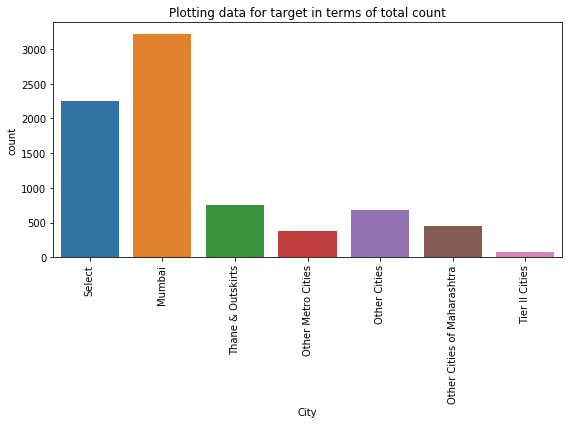

----------------------------------------------------------------------------------------------
Plotting  Asymmetrique Activity Index


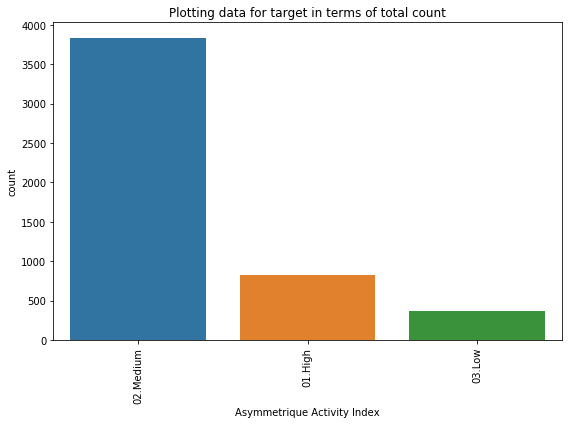

----------------------------------------------------------------------------------------------
Plotting  Asymmetrique Profile Index


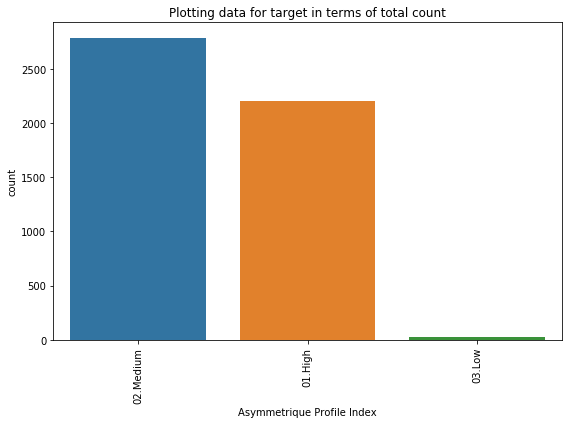

----------------------------------------------------------------------------------------------
Plotting  I agree to pay the amount through cheque


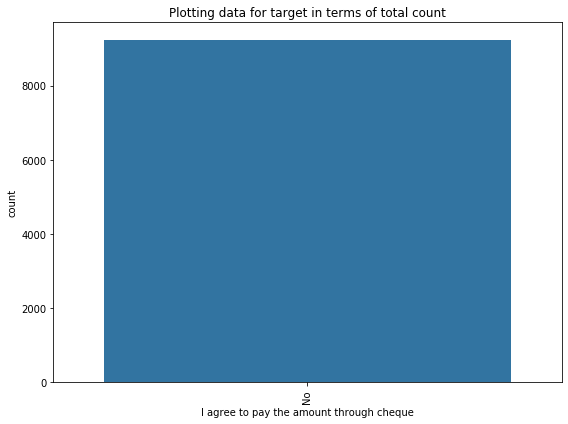

----------------------------------------------------------------------------------------------
Plotting  A free copy of Mastering The Interview


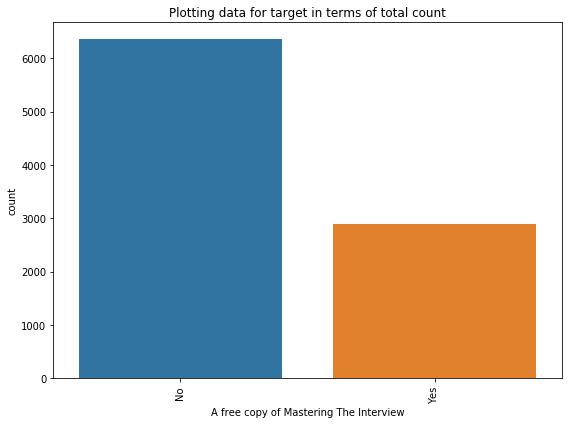

----------------------------------------------------------------------------------------------
Plotting  Last Notable Activity


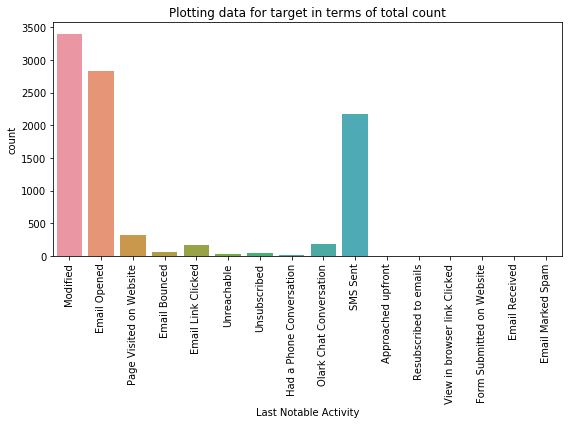

----------------------------------------------------------------------------------------------


In [8]:
#using For loop plotting the count charts
for column in cat:
    print("Plotting ", column)
    plotting(df, column)
    print('----------------------------------------------------------------------------------------------')

From the above visualization of categorical column we can see thet some attribute have "Select" which is equivalent to null value

In [9]:
#Replacing the 'Select' with nan
df=df.replace('Select',np.nan)

Plotting  Lead Origin


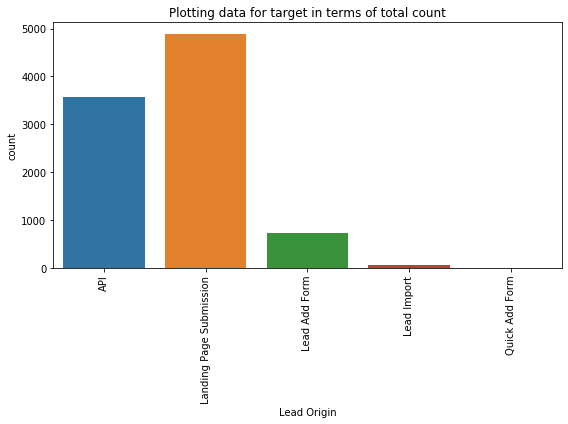

----------------------------------------------------------------------------------------------
Plotting  Lead Source


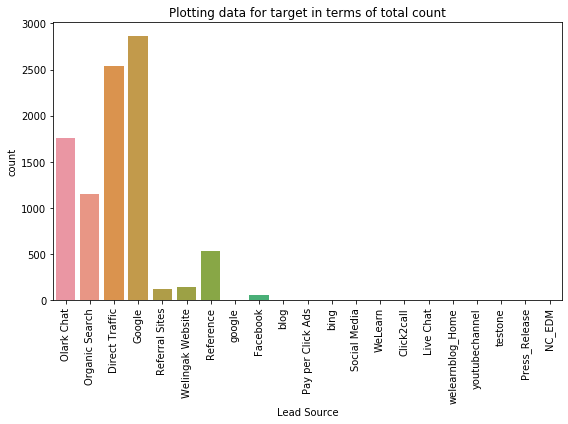

----------------------------------------------------------------------------------------------
Plotting  Do Not Email


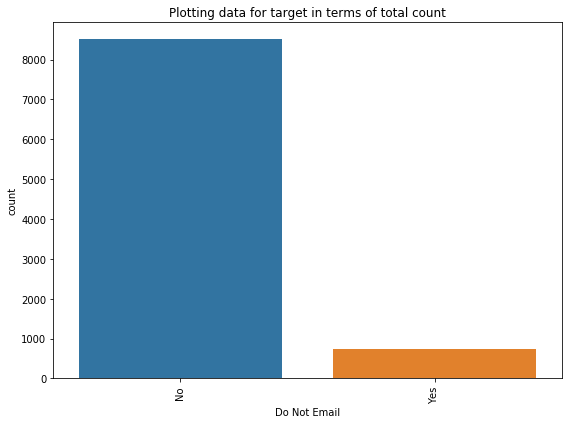

----------------------------------------------------------------------------------------------
Plotting  Do Not Call


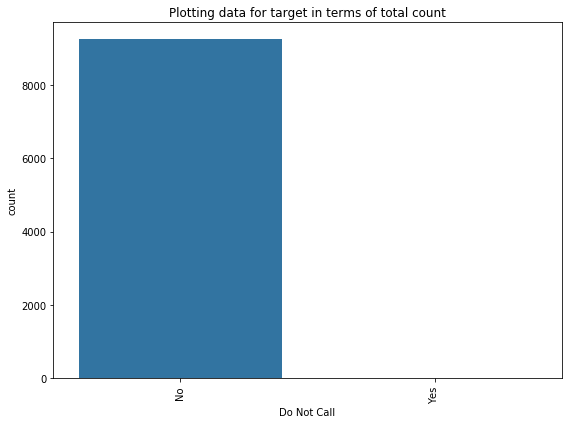

----------------------------------------------------------------------------------------------
Plotting  Last Activity


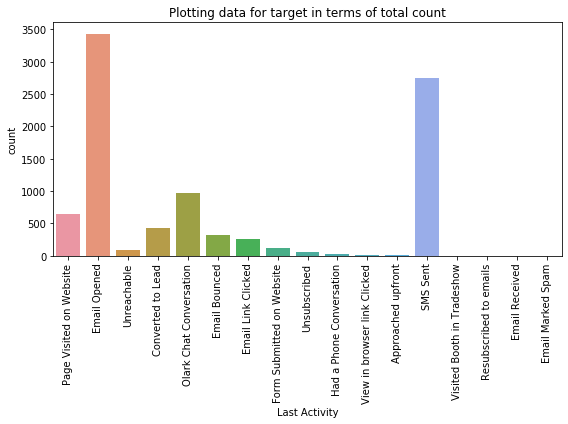

----------------------------------------------------------------------------------------------
Plotting  Country


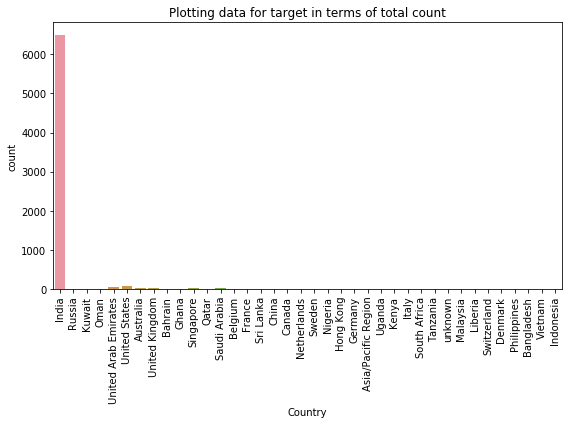

----------------------------------------------------------------------------------------------
Plotting  Specialization


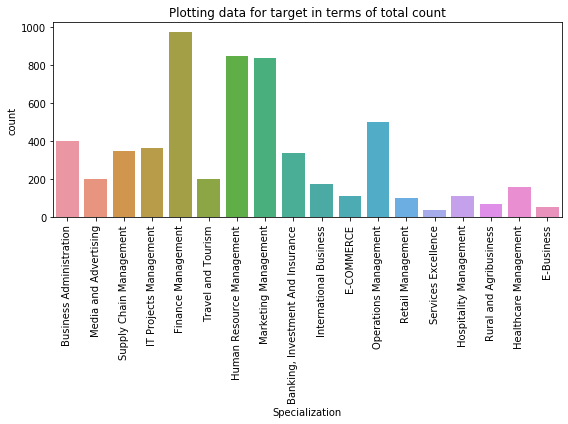

----------------------------------------------------------------------------------------------
Plotting  How did you hear about X Education


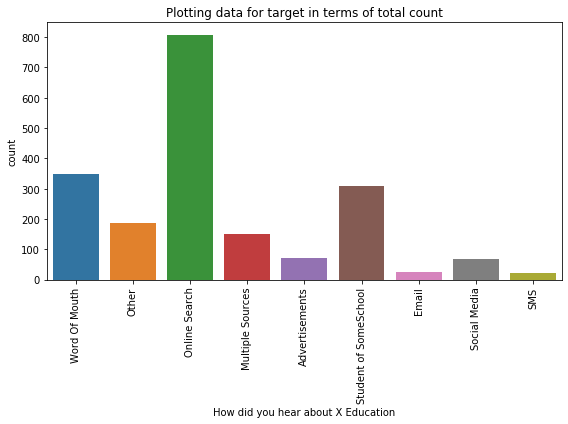

----------------------------------------------------------------------------------------------
Plotting  What is your current occupation


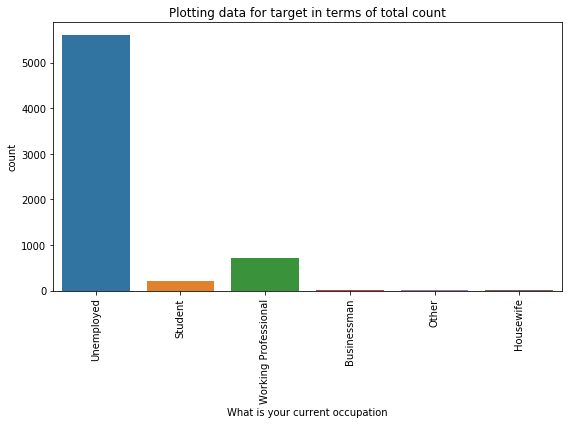

----------------------------------------------------------------------------------------------
Plotting  What matters most to you in choosing a course


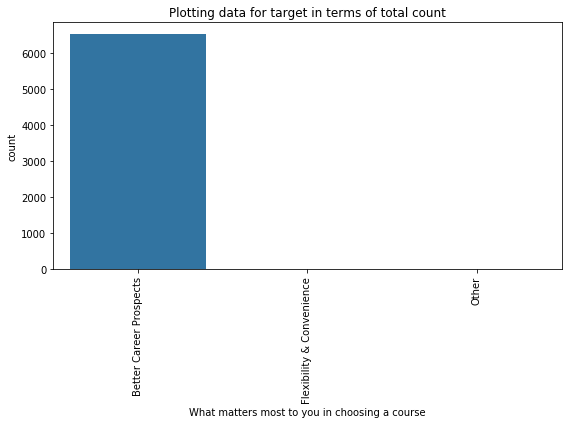

----------------------------------------------------------------------------------------------
Plotting  Search


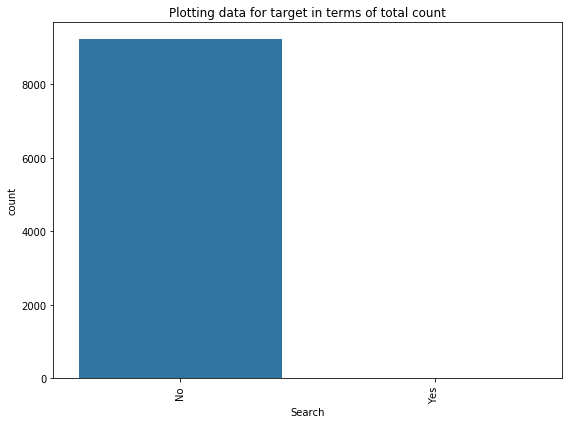

----------------------------------------------------------------------------------------------
Plotting  Magazine


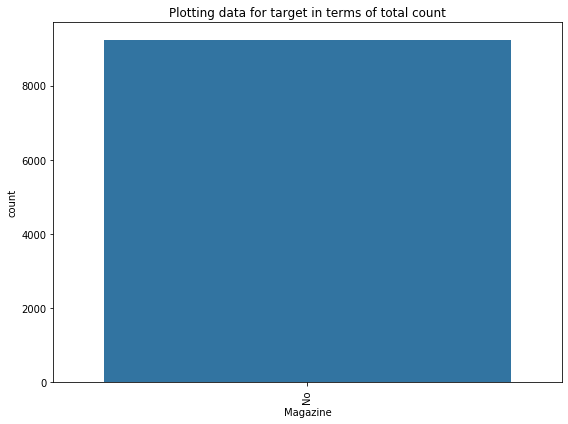

----------------------------------------------------------------------------------------------
Plotting  Newspaper Article


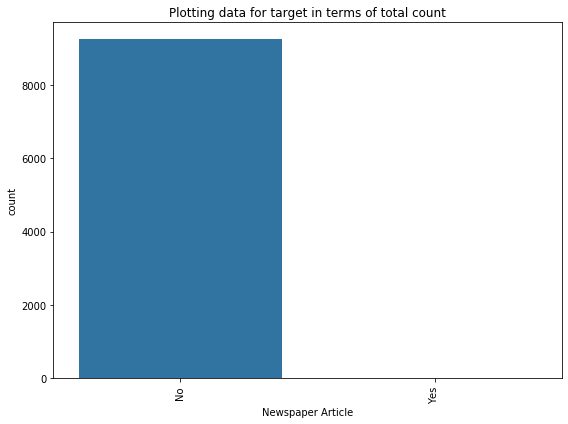

----------------------------------------------------------------------------------------------
Plotting  X Education Forums


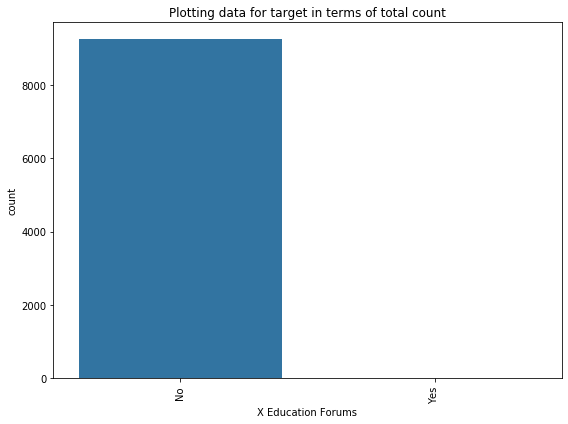

----------------------------------------------------------------------------------------------
Plotting  Newspaper


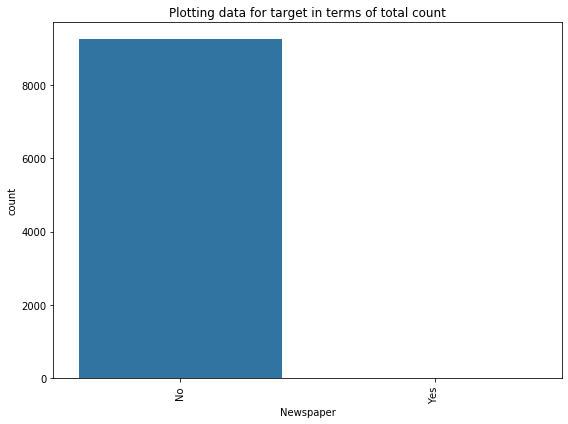

----------------------------------------------------------------------------------------------
Plotting  Digital Advertisement


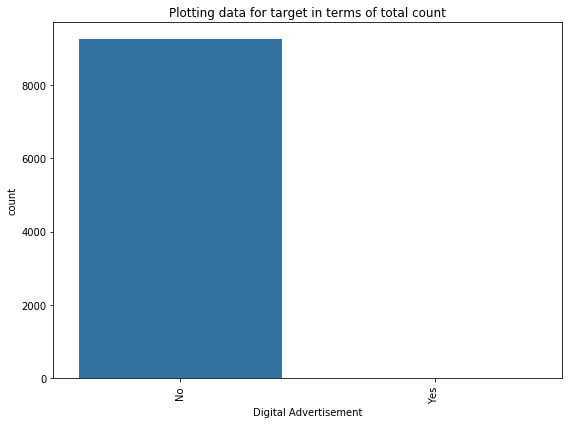

----------------------------------------------------------------------------------------------
Plotting  Through Recommendations


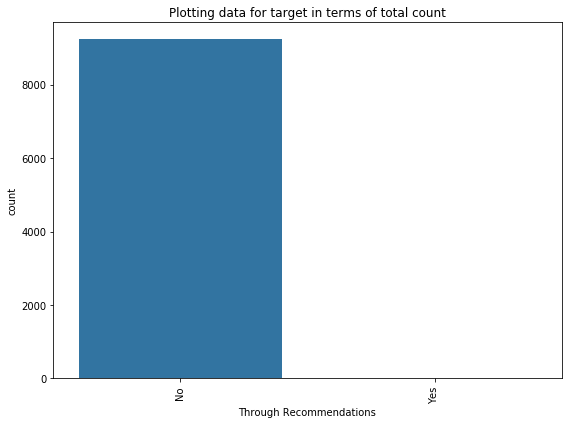

----------------------------------------------------------------------------------------------
Plotting  Receive More Updates About Our Courses


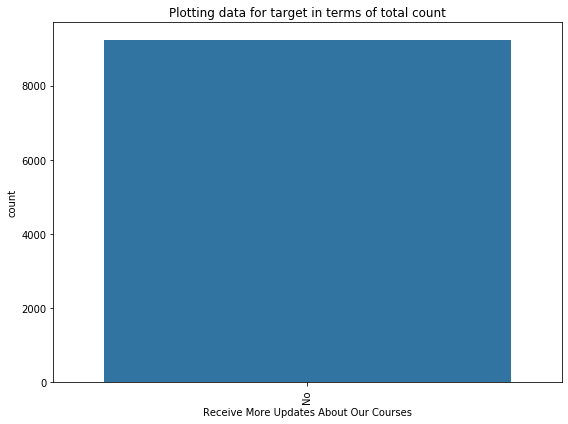

----------------------------------------------------------------------------------------------
Plotting  Tags


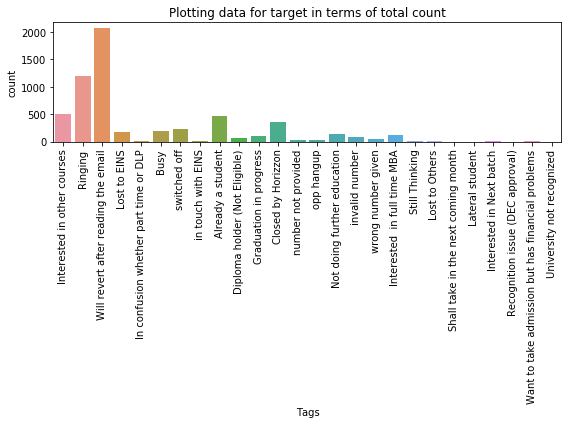

----------------------------------------------------------------------------------------------
Plotting  Lead Quality


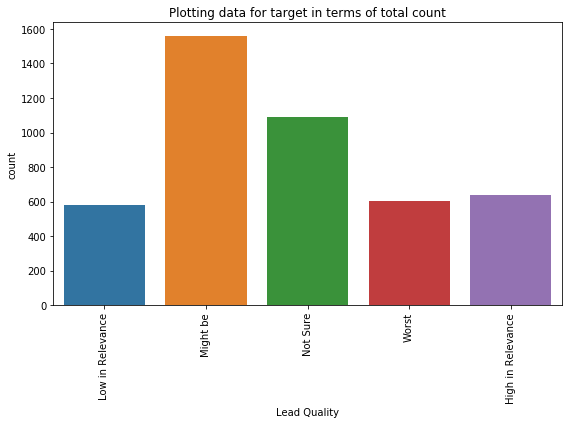

----------------------------------------------------------------------------------------------
Plotting  Update me on Supply Chain Content


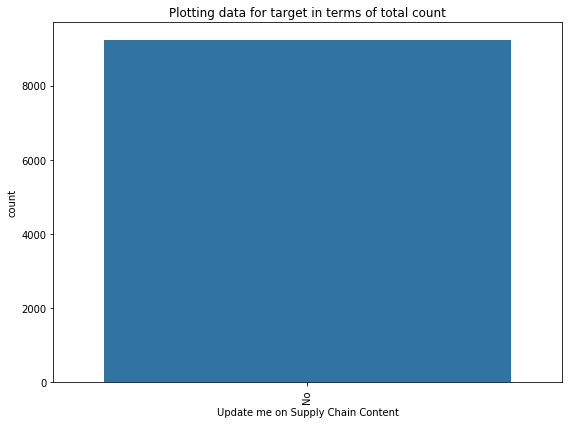

----------------------------------------------------------------------------------------------
Plotting  Get updates on DM Content


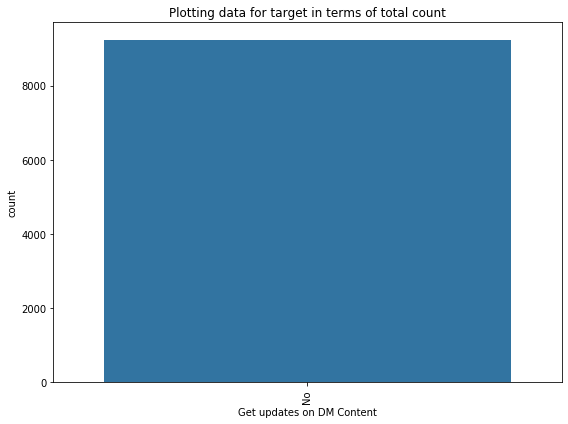

----------------------------------------------------------------------------------------------
Plotting  Lead Profile


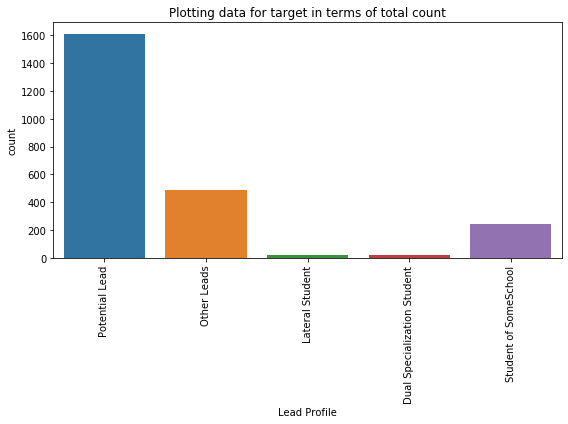

----------------------------------------------------------------------------------------------
Plotting  City


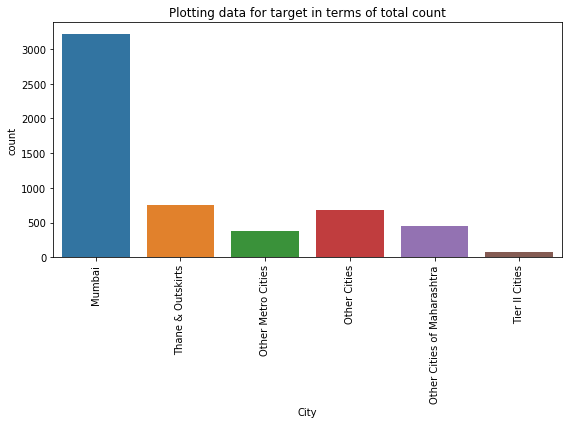

----------------------------------------------------------------------------------------------
Plotting  Asymmetrique Activity Index


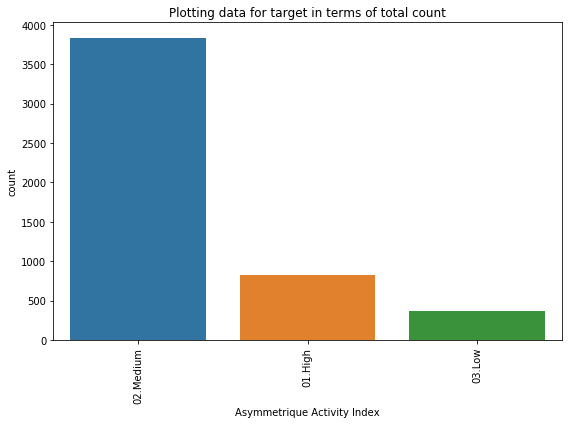

----------------------------------------------------------------------------------------------
Plotting  Asymmetrique Profile Index


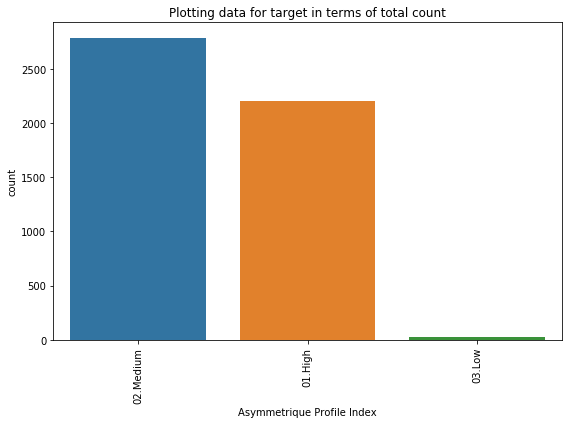

----------------------------------------------------------------------------------------------
Plotting  I agree to pay the amount through cheque


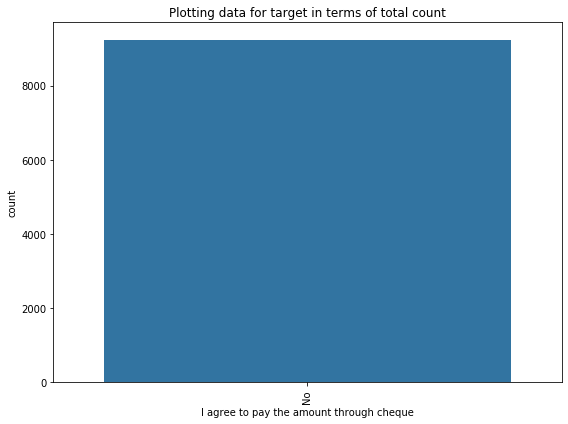

----------------------------------------------------------------------------------------------
Plotting  A free copy of Mastering The Interview


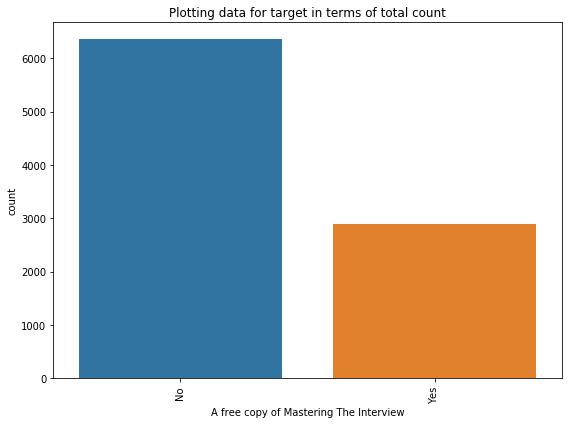

----------------------------------------------------------------------------------------------
Plotting  Last Notable Activity


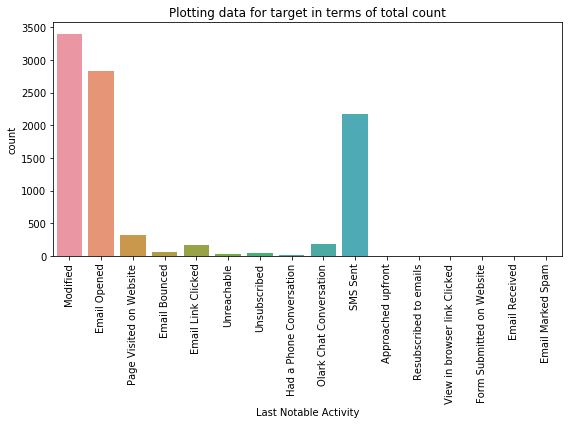

----------------------------------------------------------------------------------------------


In [10]:
#using For loop plotting the count charts
for column in cat:
    print("Plotting ", column)
    plotting(df, column)
    print('----------------------------------------------------------------------------------------------')

1. From the lead origin graph we can clear say there is a good variation and Landing page submission has the highest count
2. The graph implies that the customer do open their email a lot as the count being highest among all.
3. From the lead score graph we can clear say there is a good variation and most customer are using the Google as their lead source.
4. Unemployed Customer have the highest count in occupation category.
5. Most of the customer have heard about the X Education form online search.
6. The last activity by customer is that the maximum customer has modified their data.
7. From the lead score graph we can clear say there is a good variation and most customer are using the Google as their lead source.
8. Maximum Customer have chosen not to email about the course.
9. County : Maximum customers are from India and City : Maximum customers are from Mumbai
10. Below are the columns in the dataset which does not have any variation. Thus considering this attribute is not an ideal choice. They are : 
                1. Do Not Email
                2. Do Not Call
                3. What matters most to you in choosing a course
                4. Search
                5. X Education Forums
                6. Magazine
                7. Newspaper. etc


## Missing Value Check

In [11]:
#percentage of missing value in the data.
percentage_df = round((df.isnull().mean())*100,2)
percentage_df = pd.DataFrame(percentage_df)
percentage_df = percentage_df.reset_index() 
percentage_df.columns = ["Column_Name","Pencentage_null"]  
percentage_df

,Column_Name,Pencentage_null
0,Prospect ID,0.00
1,Lead Number,0.00
2,Lead Origin,0.00
3,Lead Source,0.39
4,Do Not Email,0.00
5,Do Not Call,0.00
6,Converted,0.00
7,TotalVisits,1.48
8,Total Time Spent on Website,0.00
9,Page Views Per Visit,1.48


In [12]:
#dropping data having above 30% of null value
df=df.loc[:,df.isna().mean()<.3]

In [13]:
#checking the shape after dropping 
df.shape

(9240, 27)

In [14]:
#displaying the first 5 rows of the dataset.
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [15]:
x=['Prospect ID','Do Not Email','Do Not Call','Country','What matters most to you in choosing a course','Search',
   'X Education Forums','Magazine','Newspaper','Newspaper Article','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
  'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
df=df.drop(x,axis=1)

In [16]:
#percentage of missing value in the data.
percentage_df = round((df.isnull().mean())*100,2)
percentage_df = pd.DataFrame(percentage_df)
percentage_df = percentage_df.reset_index() 
percentage_df.columns = ["Column_Name","Pencentage_null"]  
percentage_df

,Column_Name,Pencentage_null
0,Lead Number,0.00
1,Lead Origin,0.00
2,Lead Source,0.39
3,Converted,0.00
4,TotalVisits,1.48
5,Total Time Spent on Website,0.00
6,Page Views Per Visit,1.48
7,Last Activity,1.11
8,What is your current occupation,29.11
9,A free copy of Mastering The Interview,0.00


In [17]:
#checking the vaklue count in 'What is your current occupation'.
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [18]:
#imputing the 'What is your current occupation' with max value count.
df['What is your current occupation'].fillna(value=df['What is your current occupation'].value_counts().index[0],inplace =True)

In [19]:
#percentage of missing value in the data.
percentage_df = round((df.isnull().mean())*100,2)
percentage_df = pd.DataFrame(percentage_df)
percentage_df = percentage_df.reset_index() 
percentage_df.columns = ["Column_Name","Pencentage_null"]  
percentage_df

,Column_Name,Pencentage_null
0,Lead Number,0.00
1,Lead Origin,0.00
2,Lead Source,0.39
3,Converted,0.00
4,TotalVisits,1.48
5,Total Time Spent on Website,0.00
6,Page Views Per Visit,1.48
7,Last Activity,1.11
8,What is your current occupation,0.00
9,A free copy of Mastering The Interview,0.00


In [20]:
#dropping the nan
m_df=df.dropna()

In [21]:
#Checking the shape after dropping
m_df.shape

(9074, 11)

In [22]:
#percentage of missing value in the data.
percentage_df = round((m_df.isnull().mean())*100,2)
percentage_df = pd.DataFrame(percentage_df)
percentage_df = percentage_df.reset_index() 
percentage_df.columns = ["Column_Name","Pencentage_null"]  
percentage_df

,Column_Name,Pencentage_null
0,Lead Number,0.0
1,Lead Origin,0.0
2,Lead Source,0.0
3,Converted,0.0
4,TotalVisits,0.0
5,Total Time Spent on Website,0.0
6,Page Views Per Visit,0.0
7,Last Activity,0.0
8,What is your current occupation,0.0
9,A free copy of Mastering The Interview,0.0


In [23]:
#displaying the first 5 rows of the dataset
m_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


# Data Preparation

## Handeling Categorical Variable

In [24]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview']

# # Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# # Applying the function to the housing list
m_df[varlist] = m_df[varlist].apply(binary_map)

In [25]:
#displaying the first 5 rows
m_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


In [26]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(m_df[['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation','Last Notable Activity'
                             ]], drop_first=True)

# Adding the results to the master dataframe
l_df = pd.concat([m_df, dummy1], axis=1)

In [27]:
#displaying the first 5 rows
l_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [28]:
#dropping the original columns after creating dummies
l_df=l_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation','Last Notable Activity'],axis=1)

In [29]:
#displaying the first 5 rows
l_df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [30]:
#checking the shape
l_df.shape

(9074, 65)

## Analysis for the outliers

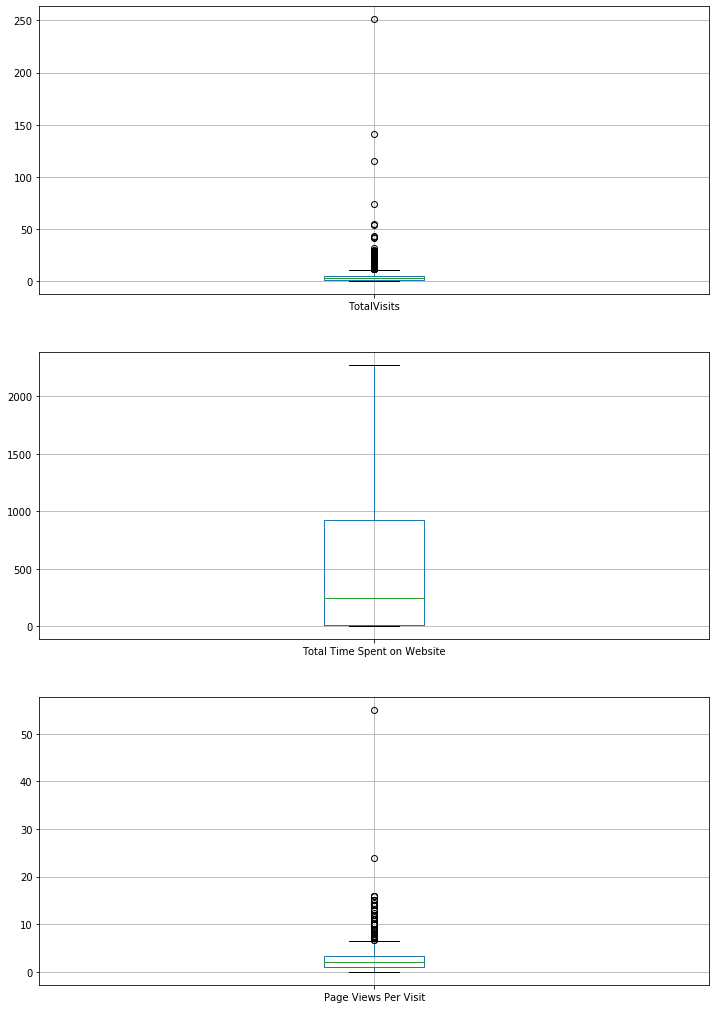

In [31]:
#plotingbox plot of numerical data for outliers
plt.figure(figsize =(12,18))
#creating subplots
plt.subplot(311)
boxplot_1 = l_df.boxplot(column=['TotalVisits'])
plt.subplot(312)
boxplot_2 = l_df.boxplot(column=['Total Time Spent on Website'])
plt.subplot(313)
boxplot_3 = l_df.boxplot(column=['Page Views Per Visit'])

In [32]:
#checking the variation in the dataset
l_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151,0.318272,0.538351,0.064029,0.003306,0.280251,0.003416,0.316068,0.000220,0.000110,0.193189,0.127177,0.000110,0.000220,0.048821,0.013776,0.000220,0.000110,0.014216,0.000661,0.000110,0.000551,0.000110,0.000110,0.000110,0.047168,0.034384,0.029425,0.000220,0.378223,0.000220,0.012784,0.002755,0.107119,0.070531,0.000110,0.299317,0.009918,0.006502,0.000661,0.000110,0.000992,0.001653,0.022702,0.899162,0.074609,0.006612,0.019065,0.000220,0.311109,0.000110,0.000110,0.001543,0.360040,0.020168,0.035045,0.000110,0.237161,0.003527,0.004959,0.000110
std,23348.029512,0.485053,4.858802,545.256560,2.160871,0.465831,0.498554,0.244818,0.057407,0.449147,0.058353,0.464965,0.014845,0.010498,0.394822,0.333189,0.010498,0.014845,0.215505,0.116565,0.014845,0.010498,0.118389,0.025707,0.010498,0.023469,0.010498,0.010498,0.010498,0.212009,0.182223,0.169003,0.014845,0.484971,0.014845,0.112347,0.052420,0.309282,0.256054,0.010498,0.457984,0.099102,0.080377,0.025707,0.010498,0.031480,0.040627,0.148961,0.301130,0.262774,0.081051,0.136763,0.014845,0.462973,0.010498,0.010498,0.039251,0.480038,0.140581,0.183904,0.010498,0.425365,0.059283,0.070251,0.01

In [33]:
#Performing the IQR method
Q1 = l_df['TotalVisits'].quantile(0.05)
Q3 = l_df['TotalVisits'].quantile(0.95)
IQR = Q3 - Q1
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
l_df = l_df.query('(@Q1 - 1.5 * @IQR) <= TotalVisits <= (@Q3 + 1.5 * @IQR)')

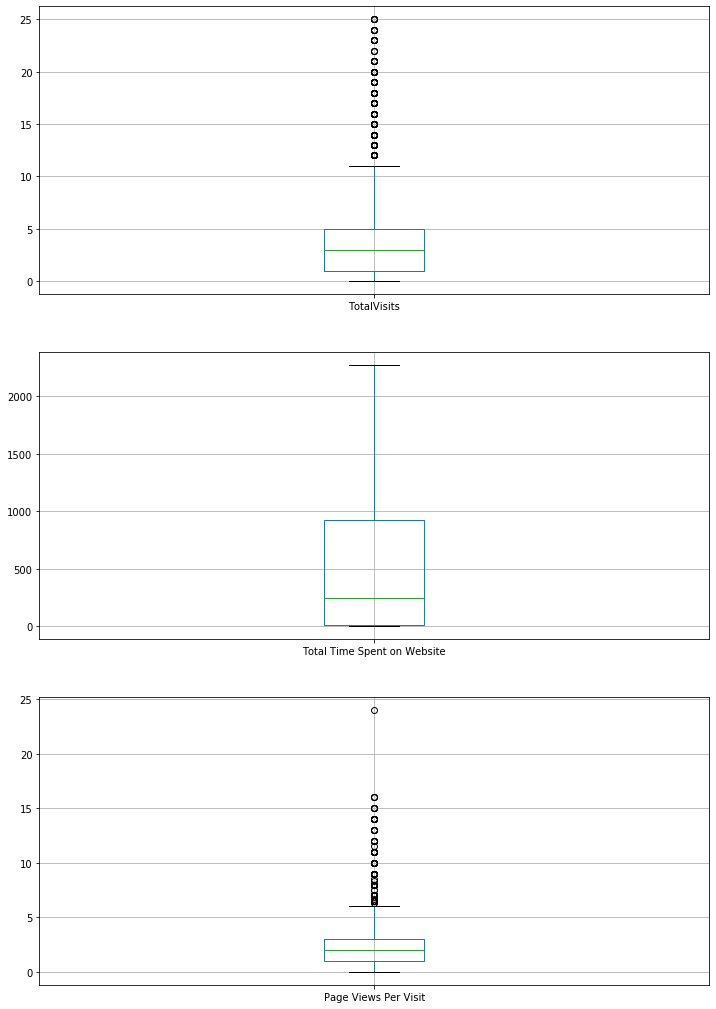

In [34]:
#ploting boxplot after outlier treatment
plt.figure(figsize =(12,18))
plt.subplot(311)
boxplot_1 = l_df.boxplot(column=['TotalVisits'])
plt.subplot(312)
boxplot_2 = l_df.boxplot(column=['Total Time Spent on Website'])
plt.subplot(313)
boxplot_3 = l_df.boxplot(column=['Page Views Per Visit'])

In [35]:
#checking the variation in the dataset after oultier treatment
l_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000
mean,617049.617764,0.378811,3.334180,483.018118,2.357406,0.317830,0.537671,0.064074,0.003314,0.279828,0.003425,0.316284,0.000221,0.000110,0.193659,0.127044,0.000110,0.000221,0.048829,0.013588,0.000221,0.000110,0.014251,0.000663,0.000110,0.000552,0.000110,0.000110,0.000110,0.047282,0.034468,0.029386,0.000221,0.378480,0.000221,0.012815,0.002762,0.107380,0.069377,0.000110,0.299713,0.009943,0.006518,0.000663,0.000110,0.000994,0.001657,0.022757,0.899028,0.074680,0.006628,0.019001,0.000221,0.311202,0.000110,0.000110,0.001547,0.360362,0.020217,0.034247,0.000110,0.237517,0.003535,0.004971,0.000110
std,23353.870123,0.485118,3.306568,545.555210,2.078127,0.465659,0.498606,0.244899,0.057477,0.448939,0.058424,0.465051,0.014863,0.010511,0.395186,0.333040,0.010511,0.014863,0.215522,0.115780,0.014863,0.010511,0.118530,0.025739,0.010511,0.023497,0.010511,0.010511,0.010511,0.212254,0.182437,0.168895,0.014863,0.485035,0.014863,0.112481,0.052483,0.309612,0.254108,0.010511,0.458157,0.099221,0.080474,0.025739,0.010511,0.031518,0.040676,0.149137,0.301309,0.262888,0.081149,0.136537,0.014863,0.463011,0.010511,0.010511,0.039299,0.480132,0.140748,0.181872,0.010511,0.425585,0.059355,0.070336,0.01

In [36]:
#checking the shape after outlier treatment
l_df.shape

(9052, 65)

## Splitting the Data into Training and Testing Sets


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# Putting feature variable to X
X = l_df.drop(['Converted','Lead Number'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [39]:
# Putting response variable to y
y = l_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [40]:
# Splitting the data into train and test
# We specify this so that the train and test data set always have the same rows, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [41]:
#Using the standard scaler for scaling 
from sklearn.preprocessing import StandardScaler

In [42]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2201,0.484097,-0.653262,0.059682,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4037,-0.998377,-0.887616,-1.134982,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1612,-0.108893,1.762943,0.298615,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9106,1.373582,1.019915,2.687942,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1236,-0.998377,-0.887616,-1.134982,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Class Imbalance

Non Converted 0: 62.12
Converted 1: 37.88


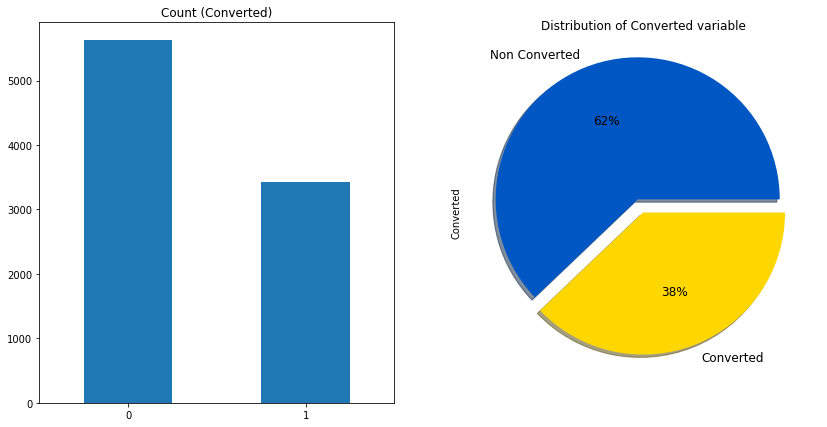

In [43]:
#plotting graph for count of defaulters and non defaulters:-
target_count = l_df.Converted.value_counts()
print('Non Converted 0:', round(target_count[0]/len(l_df)*100,2))
print('Converted 1:', round(target_count[1]/len(l_df)*100,2))

plt.figure(figsize=(14,7))
plt.subplot(121)
plt.title("Distribution of Converted variable")
target_count.plot(kind='bar', title='Count (Converted)')
plt.xticks(rotation=0)


plt.subplot(122)
l_df["Converted"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize = 12,
colors = sns.color_palette("prism",3),labels=["Non Converted","Converted"],explode=[.1,0],shadow =True)
plt.title("Distribution of Converted variable")
plt.show()

***We have almost 38% converted Rate***

# Model Building

In [44]:
#Importing statsmodel
import statsmodels.api as sm

In [45]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6336
Model:                            GLM   Df Residuals:                     6279
Model Family:                Binomial   Df Model:                           56
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 06 Jan 2020   Deviance:                          nan
Time:                        23:12:03   Pearson chi2:                 7.13e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 4.363e+15   7.38e+07   5.91e+07      0.000    4.36e+15    4.36e+15
TotalVisits                                           7.543e+13   1.26e+06   5.97e+07      0.000    7.54e+13    7.54e+13
Total Time Spent on Website                           8.343e+14   9.79e+05   8.52e+08      0.000    8.34e+14    8.34e+14
Page Views Per Visit                                 -1.114e+14   1.37e+06  -8.12e+07      0.000   -1.11e+14   -1.11e+14
A free copy of Mastering The Interview               -9.761e+13   2.63e+06  -3.71e+07      0.000   -9.76e+13   -9.76e+13
Lead Origin_Landing Page Submission                   1.447e+14   2.68e+06   5.41e+07      0.000    1.45e+14    1.45e+14
Lead Origin_Lead Add Form                             2.151e+14   4.76e+07   4.52e+06      0.000    2.15e+14    2.15e+14
Lead Origin_Lead Import                               4.247e+15   6.88e+07   6.17e+07      0.000    4.25e+15    4.25e+15
Lead Source_Direct Traffic                           -1.154e+15   6.15e+07  -1.88e+07      0.000   -1.15e+15   -1.15e+15
Lead Source_Facebook                                 -4.799e+15   9.12e+07  -5.26e+07      0.000    -4.8e+15    -4.8e+15
Lead Source_Google                                   -9.295e+14   6.14e+07  -1.51e+07      0.000    -9.3e+14    -9.3e+14
Lead Source_Live Chat                                 4.813e+15   6.14e+07   7.85e+07      0.000    4.81e+15    4.81e+15
Lead Source_NC_EDM                                      17.0673   4.01e-07   4.25e+07      0.000      17.067      17.067
Lead Source_Olark Chat                               -1.512e+15   6.13e+07  -2.46e+07      0.000   -1.51e+15   -1.51e+15
Lead Source_Organic Search                           -1.019e+15   6.15e+07  -1.66e+07      0.000   -1.02e+15   -1.02e+15
Lead Source_Pay per Click Ads                        -4.938e+15    9.1e+07  -5.43e+07      0.000   -4.94e+15   -4.94e+15
Lead Source_Press_Release                            -3.072e+15    7.8e+07  -3.94e+07      0.000   -3.07e+15   -3.07e+15
Lead Source_Reference                                 6.912e+14    3.9e+07   1.77e+07      0.000    6.91e+14    6.91e+14
Lead Source_Referral Sites                           -9.066e+14   6.18e+07  -1.47e+07      0.000   -9.07e+14   -9.07e+14
Lead Source_Social Media                             -2.774e+15   7.77e+07  -3.57e+07      0.000   -2.77e+15   -2.77e+15
Lead Source_WeLearn                                   2.224e+15    9.1e+07   2.44e+07      0.000    2.22e+15    2.22e+15
Lead Source_Welingak Website                          1.439e+15   3.95e+07   3.64e+07      0.000    1.44e+15    1.44e+15
Lead Source_bing                                     -1.32

## Feature Selection Using RFE

In [46]:
#Importing Logistic regression from Scikit learn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [47]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [48]:
#checking the ranking of each column using RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 27),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('A free copy of Mastering The Interview', False, 29),
 ('Lead Origin_Landing Page Submission', False, 36),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 10),
 ('Lead Source_Facebook', False, 46),
 ('Lead Source_Google', False, 13),
 ('Lead Source_Live Chat', False, 31),
 ('Lead Source_NC_EDM', False, 49),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 11),
 ('Lead Source_Pay per Click Ads', False, 32),
 ('Lead Source_Press_Release', False, 9),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 12),
 ('Lead Source_Social Media', False, 4),
 ('Lead Source_WeLearn', False, 23),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 44),
 ('Lead Source_blog', False, 16),
 ('Lead Source_google', False, 8),
 ('Lead Source_testone', False,

In [49]:
#selecting the 15 columns having higher rank suggested by RFE
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [50]:
#columns having lower rank as per RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       

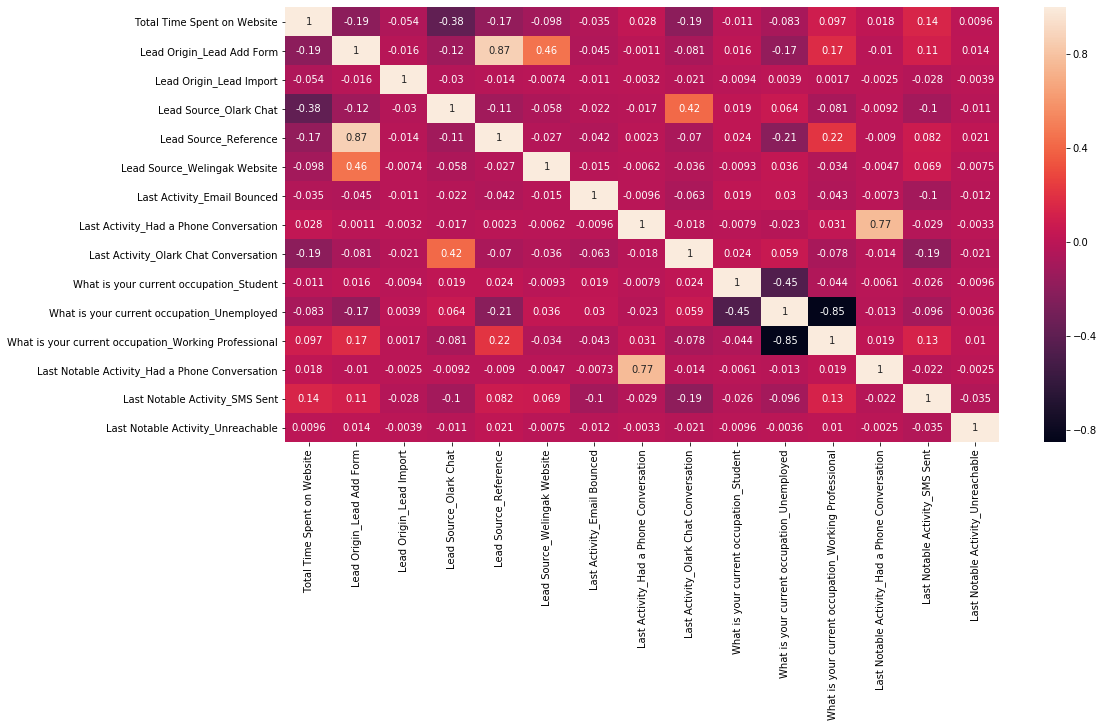

In [51]:
#Checking the Correlation 
plt.figure(figsize =(16,8))
c=X_train[col].corr()
ax = sns.heatmap(c, annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Assessing the model with StatsModels

In [52]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
#the summary of our linear model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6336
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2710.9
Date:                Mon, 06 Jan 2020   Deviance:                       5421.9
Time:                        23:12:05   Pearson chi2:                 6.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0435      0.538     -0.081      0.935      -1.098       1.011
Total Time Spent on Website                              1.1291      0.040     28.428      0.000       1.051       1.207
Lead Origin_Lead Add Form                                1.8299      0.915      1.999      0.046       0.036       3.624
Lead Origin_Lead Import                                  1.6991      0.455      3.737      0.000       0.808       2.590
Lead Source_Olark Chat                                   1.3073      0.103     12.717      0.000       1.106       1.509
Lead Source_Reference                                    2.3961      0.945      2.536      0.011       0.545       4.248
Lead Source_Welingak Website                             4.0503      1.168      3.467      0.001       1.761       6.340
Last Activity_Email Bounced                             -1.9546      0.337     -5.792      0.000      -2.616      -1.293
Last Activity_Had a Phone Conversation                   0.7088      1.026      0.691      0.490      -1.302       2.720
Last Activity_Olark Chat Conversation                   -1.4896      0.164     -9.071      0.000      -1.811      -1.168
What is your current occupation_Student                 -1.1246      0.581     -1.936      0.053      -2.263       0.014
What is your current occupation_Unemployed              -1.4466      0.539     -2.683      0.007      -2.503      -0.390
What is your current occupation_Working Professional     1.2716      0.566      2.248      0.025       0.163       2.380
Last Notable Activity_Had a Phone Conversation           2.8656      1.507      1.902      0.057      -0.088       5.819
Last Notable Activity_SMS Sent                           1.5453      0.079     19.650      0.000       1.391       1.699
Last Notable Activity_Unreachable                        1.6712      0.497      3.364      0.001       0.698       2.645
========================================================================================================================
"""

In [53]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,58.24
4,Lead Source_Reference,45.64
5,Lead Source_Welingak Website,13.75
7,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
10,What is your current occupation_Unemployed,1.79
3,Lead Source_Olark Chat,1.77
13,Last Notable Activity_SMS Sent,1.44
8,Last Activity_Olark Chat Conversation,1.41
0,Total Time Spent on Website,1.31


In [55]:
col = col.drop('Last Activity_Had a Phone Conversation')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [56]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6336
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2711.2
Date:                Mon, 06 Jan 2020   Deviance:                       5422.4
Time:                        23:12:05   Pearson chi2:                 6.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0437      0.538     -0.081      0.935      -1.098       1.011
Total Time Spent on Website                              1.1296      0.040     28.442      0.000       1.052       1.207
Lead Origin_Lead Add Form                                1.8294      0.915      1.999      0.046       0.036       3.623
Lead Origin_Lead Import                                  1.6984      0.455      3.735      0.000       0.807       2.589
Lead Source_Olark Chat                                   1.3070      0.103     12.714      0.000       1.106       1.509
Lead Source_Reference                                    2.3999      0.945      2.540      0.011       0.548       4.252
Lead Source_Welingak Website                             4.0505      1.168      3.467      0.001       1.761       6.340
Last Activity_Email Bounced                             -1.9559      0.337     -5.796      0.000      -2.617      -1.295
Last Activity_Olark Chat Conversation                   -1.4904      0.164     -9.075      0.000      -1.812      -1.169
What is your current occupation_Student                 -1.1242      0.581     -1.936      0.053      -2.263       0.014
What is your current occupation_Unemployed              -1.4454      0.539     -2.681      0.007      -2.502      -0.389
What is your current occupation_Working Professional     1.2749      0.566      2.254      0.024       0.166       2.384
Last Notable Activity_Had a Phone Conversation           3.5735      1.105      3.234      0.001       1.408       5.739
Last Notable Activity_SMS Sent                           1.5442      0.079     19.639      0.000       1.390       1.698
Last Notable Activity_Unreachable                        1.6701      0.497      3.362      0.001       0.696       2.644
========================================================================================================================
"""

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,58.24
4,Lead Source_Reference,45.64
5,Lead Source_Welingak Website,13.75
9,What is your current occupation_Unemployed,1.79
3,Lead Source_Olark Chat,1.77
12,Last Notable Activity_SMS Sent,1.44
7,Last Activity_Olark Chat Conversation,1.41
0,Total Time Spent on Website,1.31
10,What is your current occupation_Working Profes...,1.20
6,Last Activity_Email Bounced,1.06


In [58]:
col = col.drop('What is your current occupation_Student', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [59]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6336
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2713.1
Date:                Mon, 06 Jan 2020   Deviance:                       5426.3
Time:                        23:12:05   Pearson chi2:                 6.75e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0009      0.202     -4.944      0.000      -1.398      -0.604
Total Time Spent on Website                              1.1302      0.040     28.472      0.000       1.052       1.208
Lead Origin_Lead Add Form                                1.8298      0.915      1.999      0.046       0.036       3.624
Lead Origin_Lead Import                                  1.6974      0.455      3.734      0.000       0.806       2.588
Lead Source_Olark Chat                                   1.3043      0.103     12.696      0.000       1.103       1.506
Lead Source_Reference                                    2.4025      0.945      2.543      0.011       0.551       4.254
Lead Source_Welingak Website                             4.0501      1.168      3.467      0.001       1.760       6.340
Last Activity_Email Bounced                             -1.9645      0.337     -5.824      0.000      -2.626      -1.303
Last Activity_Olark Chat Conversation                   -1.4947      0.164     -9.100      0.000      -1.817      -1.173
What is your current occupation_Unemployed              -0.4864      0.203     -2.397      0.017      -0.884      -0.089
What is your current occupation_Working Professional     2.2335      0.266      8.401      0.000       1.712       2.755
Last Notable Activity_Had a Phone Conversation           3.5720      1.105      3.233      0.001       1.406       5.738
Last Notable Activity_SMS Sent                           1.5403      0.079     19.590      0.000       1.386       1.694
Last Notable Activity_Unreachable                        1.6687      0.497      3.359      0.001       0.695       2.642
========================================================================================================================
"""

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,58.24
4,Lead Source_Reference,45.64
5,Lead Source_Welingak Website,13.75
8,What is your current occupation_Unemployed,1.77
3,Lead Source_Olark Chat,1.75
11,Last Notable Activity_SMS Sent,1.43
7,Last Activity_Olark Chat Conversation,1.40
0,Total Time Spent on Website,1.31
9,What is your current occupation_Working Profes...,1.20
6,Last Activity_Email Bounced,1.05


In [61]:
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [62]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6336
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2715.3
Date:                Mon, 06 Jan 2020   Deviance:                       5430.7
Time:                        23:12:05   Pearson chi2:                 6.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0001      0.202     -4.941      0.000      -1.397      -0.603
Total Time Spent on Website                              1.1290      0.040     28.468      0.000       1.051       1.207
Lead Origin_Lead Import                                  1.6928      0.455      3.724      0.000       0.802       2.584
Lead Source_Olark Chat                                   1.3034      0.103     12.700      0.000       1.102       1.505
Lead Source_Reference                                    4.2280      0.243     17.365      0.000       3.751       4.705
Lead Source_Welingak Website                             5.8755      0.729      8.055      0.000       4.446       7.305
Last Activity_Email Bounced                             -1.9668      0.337     -5.832      0.000      -2.628      -1.306
Last Activity_Olark Chat Conversation                   -1.4976      0.164     -9.121      0.000      -1.819      -1.176
What is your current occupation_Unemployed              -0.4836      0.203     -2.383      0.017      -0.881      -0.086
What is your current occupation_Working Professional     2.2331      0.266      8.400      0.000       1.712       2.754
Last Notable Activity_Had a Phone Conversation           3.5680      1.105      3.229      0.001       1.402       5.734
Last Notable Activity_SMS Sent                           1.5408      0.079     19.599      0.000       1.387       1.695
Last Notable Activity_Unreachable                        1.6652      0.497      3.352      0.001       0.692       2.639
========================================================================================================================
"""

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_Unemployed,1.77
2,Lead Source_Olark Chat,1.75
10,Last Notable Activity_SMS Sent,1.43
6,Last Activity_Olark Chat Conversation,1.40
0,Total Time Spent on Website,1.31
3,Lead Source_Reference,1.20
8,What is your current occupation_Working Profes...,1.20
4,Lead Source_Welingak Website,1.05
5,Last Activity_Email Bounced,1.05
1,Lead Origin_Lead Import,1.01


In [64]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [65]:
y_train_pred[:10]

array([0.02368592, 0.23460556, 0.88567752, 0.41768182, 0.0641584 ,
       0.3750208 , 0.61578789, 0.9638359 , 0.2035964 , 0.02253099])

In [66]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,ID
0,0,0.023686,2201
1,1,0.234606,4037
2,1,0.885678,1612
3,0,0.417682,9106
4,0,0.064158,1236


In [67]:
 y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# # Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted
0,0,0.023686,2201,0
1,1,0.234606,4037,0
2,1,0.885678,1612,1
3,0,0.417682,9106,0
4,0,0.064158,1236,0


In [68]:
#importing metrics from scikit learn
from sklearn import metrics

In [69]:
# # Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3445  459]
 [ 770 1662]]


In [70]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8060290404040404


In [71]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [72]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6833881578947368

In [73]:
# Let us calculate specificity
TN / float(TN+FP)

0.8824282786885246

In [74]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1175717213114754


In [75]:
# positive predictive value 
print (TP / float(TP+FP))

0.7835926449787836


In [76]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8173190984578885


## ROC

In [77]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [78]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

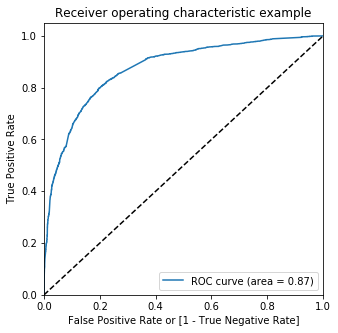

In [79]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Finding Optimal Cutoff Point

In [80]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.023686,2201,0,1,0,0,0,0,0,0,0,0,0
1,1,0.234606,4037,0,1,1,1,0,0,0,0,0,0,0
2,1,0.885678,1612,1,1,1,1,1,1,1,1,1,1,0
3,0,0.417682,9106,0,1,1,1,1,1,0,0,0,0,0
4,0,0.064158,1236,0,1,0,0,0,0,0,0,0,0,0


In [81]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383838  1.000000  0.000000
0.1   0.1  0.582544  0.965049  0.344262
0.2   0.2  0.734217  0.917763  0.619877
0.3   0.3  0.787563  0.834293  0.758453
0.4   0.4  0.805713  0.756990  0.836066
0.5   0.5  0.806029  0.683388  0.882428
0.6   0.6  0.788826  0.567434  0.926742
0.7   0.7  0.775568  0.491776  0.952357
0.8   0.8  0.758049  0.413651  0.972592
0.9   0.9  0.704703  0.249589  0.988217


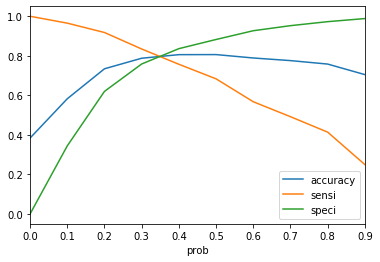

In [82]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [83]:
#thus we take optimal cut-off point as 0.34
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.023686,2201,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.234606,4037,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.885678,1612,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.417682,9106,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.064158,1236,0,1,0,0,0,0,0,0,0,0,0,0


In [84]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7989267676767676

In [85]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3106,  798],
       [ 476, 1956]], dtype=int64)

In [86]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [87]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8042763157894737

In [88]:
# Let us calculate specificity
TN / float(TN+FP)

0.795594262295082

In [89]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20440573770491804


In [90]:
# Positive predictive value 
print (TP / float(TP+FP))

0.710239651416122


In [91]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8671133445002792


# Precision and Recall

In [92]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3445,  459],
       [ 770, 1662]], dtype=int64)

In [93]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7835926449787836

In [94]:
#recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6833881578947368

**Using the scikit learn to calculate the precision and recall score

In [95]:
from sklearn.metrics import precision_score, recall_score

In [96]:
#precision score
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7835926449787836

In [97]:
#Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6833881578947368

In [98]:
from sklearn.metrics import precision_recall_curve

In [99]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

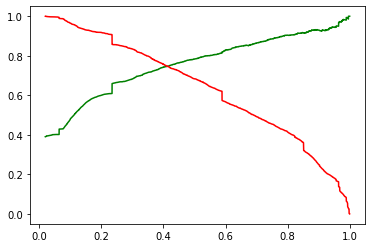

In [100]:
#plotting the Curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [101]:
#Scaling the test data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [102]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
5455,-0.887616,0,0,1,0,0,0,1,0,0,0,0
1526,-0.611478,0,0,0,0,0,0,1,0,0,0,0
1034,-0.862182,0,0,0,0,0,0,1,0,0,0,0
7062,-0.364407,0,0,0,0,0,0,1,0,0,1,0
7716,1.437755,0,0,0,0,0,0,1,0,0,1,0


In [103]:
#Adding constant
X_test_sm = sm.add_constant(X_test)

In [104]:
y_test_pred = res.predict(X_test_sm)

In [105]:
y_test_pred[:10]

5455    0.850954
1526    0.102098
1034    0.078916
7062    0.412309
7716    0.842930
2313    0.736836
6297    0.763793
5828    0.086375
737     0.967379
8128    0.588621
dtype: float64

In [106]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [107]:
# Let's see the head
y_pred_1.head()

,0
5455,0.850954
1526,0.102098
1034,0.078916
7062,0.412309
7716,0.842930


In [108]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [109]:
# Putting CustID to index
y_test_df['ID'] = y_test_df.index

In [110]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [111]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [112]:
y_pred_final.head()

,Converted,ID,0
0,1,5455,0.850954
1,0,1526,0.102098
2,0,1034,0.078916
3,0,7062,0.412309
4,1,7716,0.842930


In [113]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [114]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ID','Converted','Converted_Prob'], axis=1)

In [115]:
# Let's see the head of y_pred_final
y_pred_final.head()

,ID,Converted,Converted_Prob
0,5455,1,0.850954
1,1526,0,0.102098
2,1034,0,0.078916
3,7062,0,0.412309
4,7716,1,0.842930


In [116]:
#taking the Cut-off point as 0.34
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)

In [117]:
y_pred_final.head()

,ID,Converted,Converted_Prob,final_predicted
0,5455,1,0.850954,1
1,1526,0,0.102098,0
2,1034,0,0.078916,0
3,7062,0,0.412309,1
4,7716,1,0.842930,1


In [118]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8070692194403535

In [119]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1389,  330],
       [ 194,  803]], dtype=int64)

In [120]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [121]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8054162487462387

In [122]:
# Let us calculate specificity
TN / float(TN+FP)

0.8080279232111692

In [123]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19197207678883071


In [124]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7087378640776699


In [125]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8774478837650032


In [126]:
#Displaying the 20 predicted IDs
y_pred_final.head(20)

,ID,Converted,Converted_Prob,final_predicted
0,5455,1,0.850954,1
1,1526,0,0.102098,0
2,1034,0,0.078916,0
3,7062,0,0.412309,1
4,7716,1,0.842930,1
5,2313,0,0.736836,1
6,6297,1,0.763793,1
7,5828,0,0.086375,0
8,737,1,0.967379,1
9,8128,0,0.588621,1


In [127]:
#precision
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7087378640776699

In [128]:
#recall
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8054162487462387

In [129]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

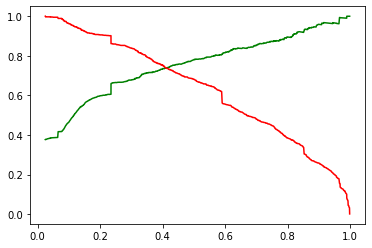

In [130]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

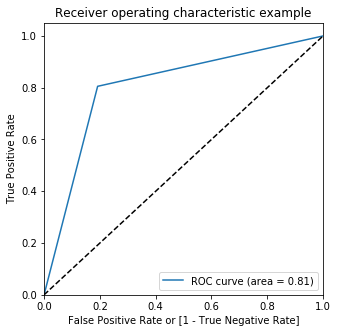

In [131]:
#ROC on test set
draw_roc(y_pred_final.Converted, y_pred_final.final_predicted)

In [132]:
#lead score for customer in the range 0-100
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map(lambda x: x*100)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.023686,2201,0,1,0,0,0,0,0,0,0,0,0,0,2.368592
1,1,0.234606,4037,0,1,1,1,0,0,0,0,0,0,0,0,23.460556
2,1,0.885678,1612,1,1,1,1,1,1,1,1,1,1,0,1,88.567752
3,0,0.417682,9106,0,1,1,1,1,1,0,0,0,0,0,1,41.768182
4,0,0.064158,1236,0,1,0,0,0,0,0,0,0,0,0,0,6.415840


1. we have considered 34% as cut-off and the fianl lead score of the customer has been displayed above.
2. Thus if the lead score is below 34% then the customer is consider cold lead and if the customer's lead score is above 34%      then it is considered as hot lead.

In [133]:
#Selecting the coefficients of the selected features from our final model excluding the intercept
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Total Time Spent on Website                             1.13
Lead Origin_Lead Import                                 1.69
Lead Source_Olark Chat                                  1.30
Lead Source_Reference                                   4.23
Lead Source_Welingak Website                            5.88
Last Activity_Email Bounced                            -1.97
Last Activity_Olark Chat Conversation                  -1.50
What is your current occupation_Unemployed             -0.48
What is your current occupation_Working Professional    2.23
Last Notable Activity_Had a Phone Conversation          3.57
Last Notable Activity_SMS Sent                          1.54
Last Notable Activity_Unreachable                       1.67
dtype: float64

In [134]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Total Time Spent on Website                             19.22
Lead Origin_Lead Import                                 28.81
Lead Source_Olark Chat                                  22.18
Lead Source_Reference                                   71.96
Lead Source_Welingak Website                           100.00
Last Activity_Email Bounced                            -33.47
Last Activity_Olark Chat Conversation                  -25.49
What is your current occupation_Unemployed              -8.23
What is your current occupation_Working Professional    38.01
Last Notable Activity_Had a Phone Conversation          60.73
Last Notable Activity_SMS Sent                          26.22
Last Notable Activity_Unreachable                       28.34
dtype: float64

In [135]:
#Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Total Time Spent on Website                              5
Lead Origin_Lead Import                                  6
Lead Source_Olark Chat                                   7
Lead Source_Reference                                    0
Lead Source_Welingak Website                             2
Last Activity_Email Bounced                             10
Last Activity_Olark Chat Conversation                   11
What is your current occupation_Unemployed               1
What is your current occupation_Working Professional     8
Last Notable Activity_Had a Phone Conversation           9
Last Notable Activity_SMS Sent                           3
Last Notable Activity_Unreachable                        4
dtype: int64

<Figure size 864x576 with 0 Axes>

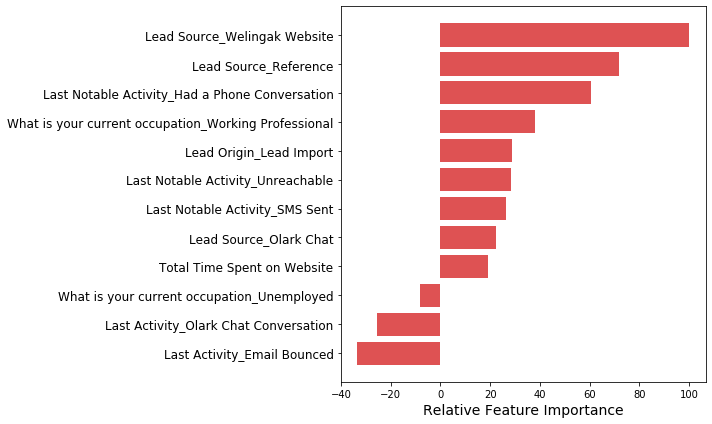

In [136]:
#Plot showing the feature variables based on their relative coefficient values
#Plotting the scree plot
fig = plt.figure(figsize = (12,8))
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

Above are the top feature that need to be considered for making predection.

# END